In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [32]:
x = [np.log(i) for i in range(1,100)]

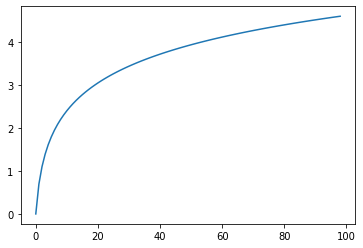

In [33]:
plt.plot(x)

# Defining signal

In [31]:
# Heaviside step function. I use eta to be consistent with my professor's notation
def eta(x):
    r = 0
    if x > 0:
        r = 1
    if x == 0:
        r = 0.5
    return r

In [5]:
def theta(t, tau):
    return eta(t / tau) - eta(t / (tau - 1))

In [6]:
# My signal
@np.vectorize
def s(t, tau, n, A):
    return ((-1)**n) * A * (1 - abs(2 * t / (tau - 1))) * np.sin((2 * np.pi * n * t) / tau) * theta(t, tau)

# Plotting with different args:

In [78]:
def plot(t, tau, n, A):
    x = np.linspace(0, t, 1024)
    y = s(x, tau, n, A)
    plt.figure()
    plt.plot(x, y)
    plt.xlabel("t")
    plt.ylabel("s(t)")
    plt.show()

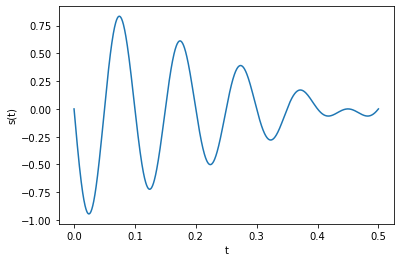

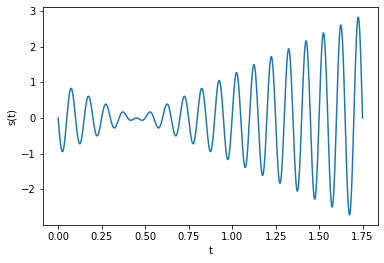

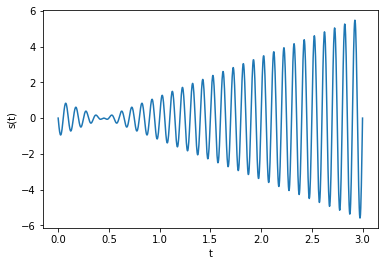

In [79]:
for i in np.linspace(0.5, 3, 3):
    plot(i, 0.1, 1, 1) 

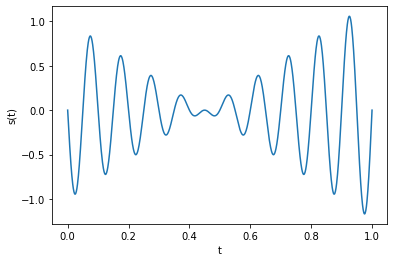

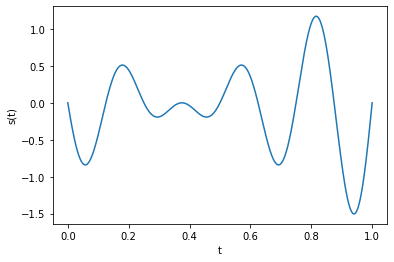

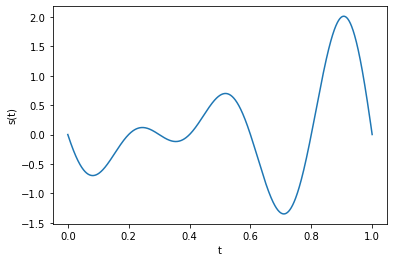

In [80]:
for tau in np.linspace(0.1, 0.4, 3):
    plot(1, tau, 1, 1)

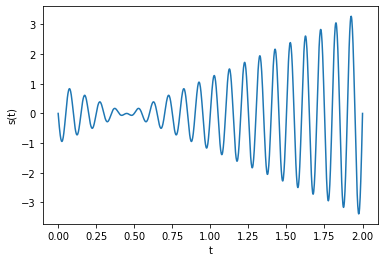

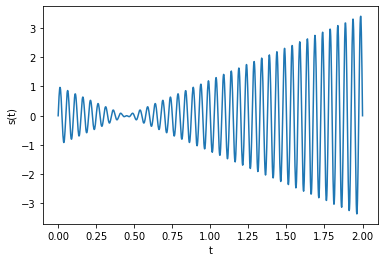

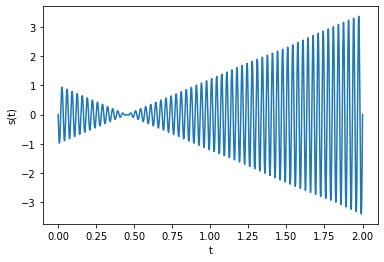

In [37]:
#for diffrent n
for n in range(1, 4):
    plot(2, 0.1, n, 1) 

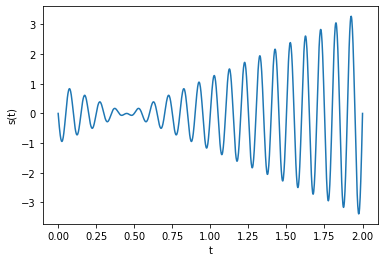

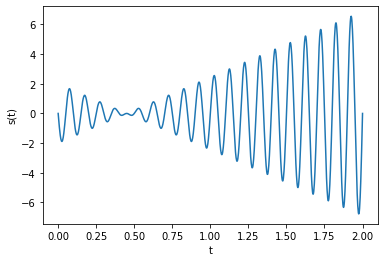

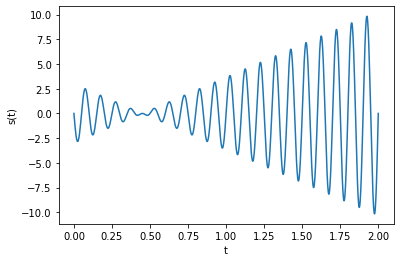

In [36]:
for a in range(1, 4):
    plot(2, 0.1, 1, a) 

#  Doing some DFT

In [ ]:
from scipy import fftpack
from scipy.fft import rfft, rfftfreq

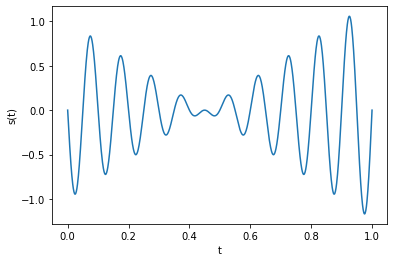

In [236]:
x = np.linspace(0, 1, 1024)
y = s(x, 0.1, 1, 1)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('t')
ax.set_ylabel('s(t)');

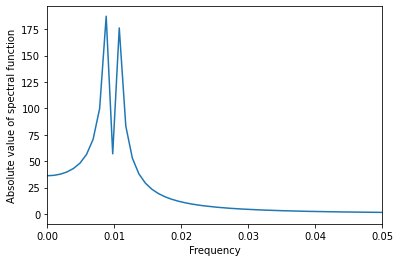

In [77]:
Y = rfft(y)
freqs = rfftfreq(len(y))  

fig, ax = plt.subplots()
ax.plot(freqs, np.abs(Y))
ax.set_xlabel('Frequency')
ax.set_ylabel('Absolute value of spectral function')
ax.set_xlim(0, 0.05)
plt.show()

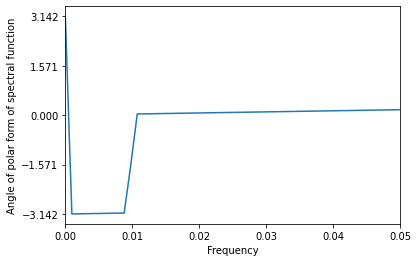

In [141]:
Y = rfft(y)
freqs = rfftfreq(len(y))  

fig, ax = plt.subplots()

ax.plot(freqs, np.angle(Y))
ax.set_xlabel('Frequency')
ax.set_ylabel('Angle of polar form of spectral function')
ax.set_xlim(0, 0.05)
plt.yticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.show()

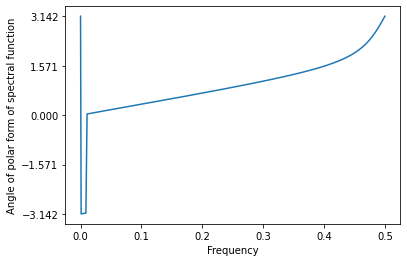

In [87]:
Y = rfft(y)
freqs = rfftfreq(len(y))  

fig, ax = plt.subplots()

ax.plot(freqs, np.angle(Y))
ax.set_xlabel('Frequency')
ax.set_ylabel('Angle of polar form of spectral function')
plt.yticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.show()

# Invers FFT & Gibbs-like phenomenon after the removal of high freqs

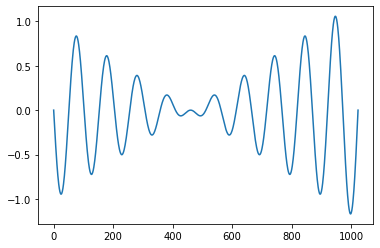

In [301]:
plt.plot(y)

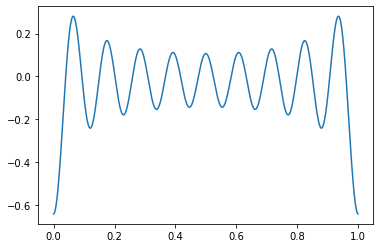

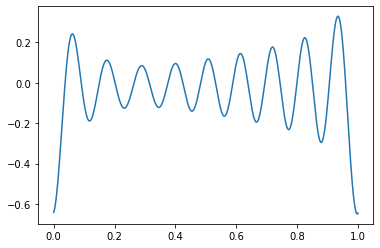

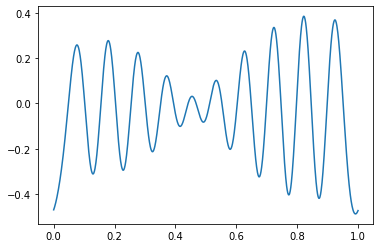

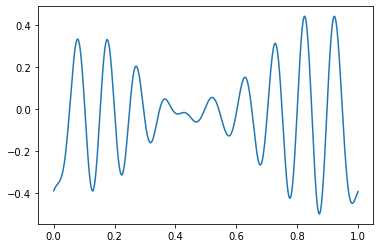

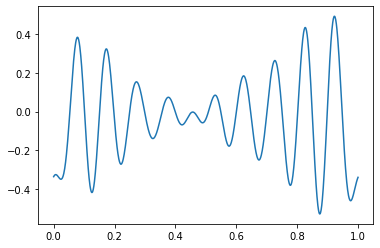

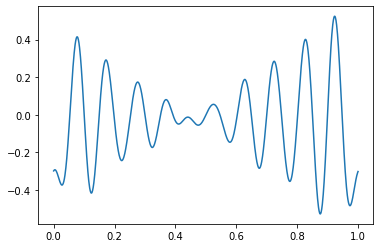

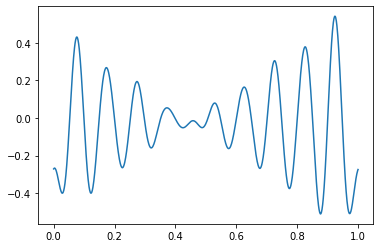

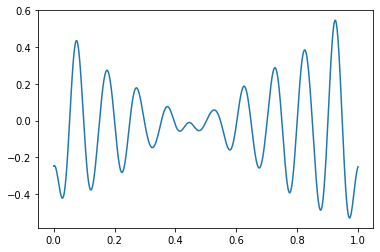

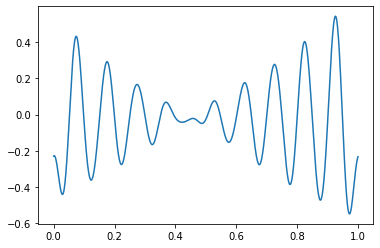

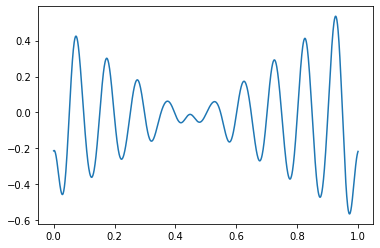

In [404]:
# zeroing high frequency points in the spectral function & doing inverse fft
for i in range(10, 20):
    sp = fft(y)
    sp[i: ] = 0
    plt.plot(x, ifft(sp).real)
    plt.show()

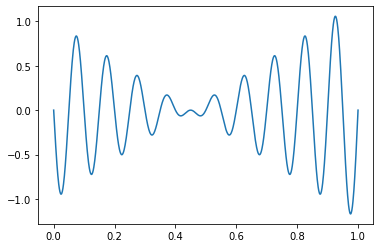

In [403]:
# comparng with the actual signa; not bad for just 20 non zero points left in the spectrum
plt.plot(x, y)

# DFT with windows

In [ ]:
from scipy import signal